# Supply Chain Lead-Time & Bottleneck Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\eshar\AppData\Local\Temp\ipykernel_9416\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Loading

In [3]:
df=pd.read_csv("DataCoSupplyChainDataset.csv",encoding="latin1")

In [4]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


### Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [7]:
df.shape

(180519, 53)

## Handling Missing Values

In [8]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [9]:
df.drop(columns=[
    "Product Description",
    "Order Zipcode"
],inplace=True)

In [10]:
# replacing the column names
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
)


In [11]:
## droping the unnecessary columns
df.drop(columns=["customer_email","customer_password","product_image"],inplace=True)

In [12]:
df.rename(columns={
    "order_date_dateorders":"Order_date",
    "shipping_date_dateorders":"Shipping_Date"
},inplace=True)



In [13]:
df.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_fname', 'customer_id', 'customer_lname',
       'customer_segment', 'customer_state', 'customer_street',
       'customer_zipcode', 'department_id', 'department_name', 'latitude',
       'longitude', 'market', 'order_city', 'order_country',
       'order_customer_id', 'Order_date', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'product_status', 'Shipping_Date', 'shipping_mode'],
     

### Converting datatype of Date Columns

In [14]:
df["Order_date"]=pd.to_datetime(df["Order_date"],errors="coerce")
df["Shipping_Date"]=pd.to_datetime(df["Shipping_Date"],errors="coerce")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   type                         180519 non-null  object        
 1   days_for_shipping_real       180519 non-null  int64         
 2   days_for_shipment_scheduled  180519 non-null  int64         
 3   benefit_per_order            180519 non-null  float64       
 4   sales_per_customer           180519 non-null  float64       
 5   delivery_status              180519 non-null  object        
 6   late_delivery_risk           180519 non-null  int64         
 7   category_id                  180519 non-null  int64         
 8   category_name                180519 non-null  object        
 9   customer_city                180519 non-null  object        
 10  customer_country             180519 non-null  object        
 11  customer_fname            

### Statistical Summary

In [36]:
np.mean(df['delivery_delay'])

0.5658074773292562

In [37]:
np.median(df['delivery_delay'])

1.0

In [38]:
np.percentile(df['delivery_delay'], [25, 50, 75])

array([0., 1., 1.])

In [16]:
df.rename(columns={
    "days_for_shipping_real":"Shipping_Days",
    "days_for_shipment_scheduled":"Shipment_days"
},inplace=True)

## Distribution of shipping days

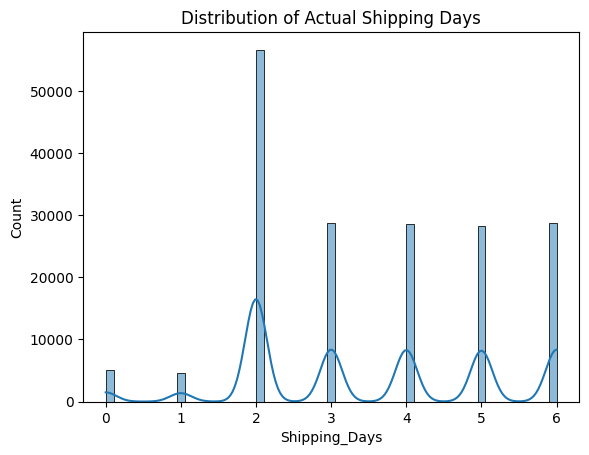

In [39]:
sns.histplot(df["Shipping_Days"],kde=True)
plt.title("Distribution of Actual Shipping Days")
plt.show()

In [19]:
df.columns

Index(['type', 'Shipping_Days', 'Shipment_days', 'benefit_per_order',
       'sales_per_customer', 'delivery_status', 'late_delivery_risk',
       'category_id', 'category_name', 'customer_city', 'customer_country',
       'customer_fname', 'customer_id', 'customer_lname', 'customer_segment',
       'customer_state', 'customer_street', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'Order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'product_status', 'Shipping_Date',
       'shipping_mode'],
      dtype='object')

In [20]:
df["shipping_mode"].value_counts()

shipping_mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

## Order Distribution by Shipping Mode

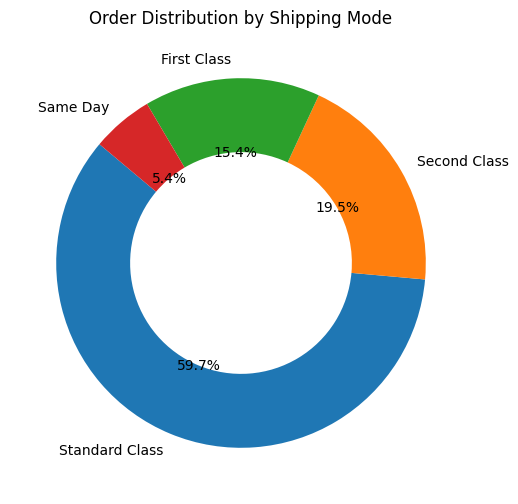

In [40]:
shipping_counts = df['shipping_mode'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    shipping_counts,
    labels=shipping_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)
plt.title("Order Distribution by Shipping Mode")
plt.show()


### Create Delivery Delay (Feature Enginnering)

In [22]:
df["delivery_delay"]=df["Shipping_Days"]-df["Shipment_days"]

In [23]:
# delay status

df["delay_status"]=np.where(
    df["delivery_delay"]>0,"Late",
    np.where(df["delivery_delay"]<0,"Early","On-time")
)

In [24]:
df["delay_status"].value_counts()

delay_status
Late       103400
Early       43366
On-time     33753
Name: count, dtype: int64

## Average Delivery Delay by shipping mode

In [25]:
df.groupby("shipping_mode")["delivery_delay"].mean().sort_values()

shipping_mode
Standard Class   -0.004093
Same Day          0.478279
First Class       1.000000
Second Class      1.990828
Name: delivery_delay, dtype: float64

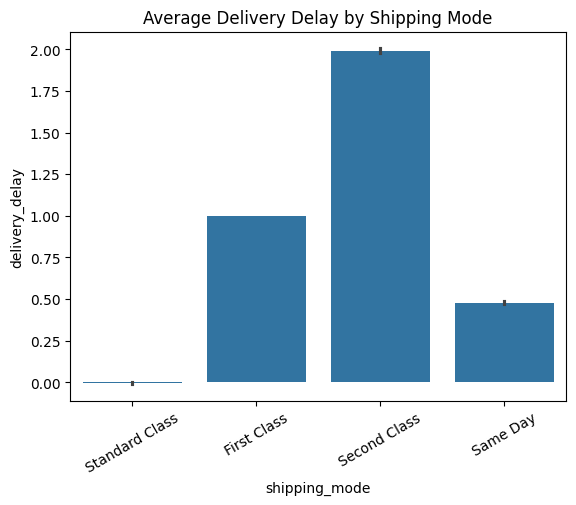

In [26]:
sns.barplot(x="shipping_mode", y="delivery_delay", data=df)
plt.xticks(rotation=30)
plt.title("Average Delivery Delay by Shipping Mode")
plt.show()

## Region-wise Delay

In [27]:
df.groupby("order_region")["delivery_delay"].mean().sort_values()

order_region
Canada             0.391032
Southern Africa    0.478825
Southern Europe    0.515640
Caribbean          0.546526
Northern Europe    0.546875
West Africa        0.550595
North Africa       0.552290
Oceania            0.556267
South America      0.556344
West of USA        0.557238
Southeast Asia     0.558235
Central America    0.561942
Eastern Asia       0.566484
West Asia          0.569479
East Africa        0.570734
Eastern Europe     0.579847
South of  USA      0.579975
East of USA        0.584816
US Center          0.587226
Western Europe     0.597403
South Asia         0.597465
Central Africa     0.639833
Central Asia       0.645570
Name: delivery_delay, dtype: float64

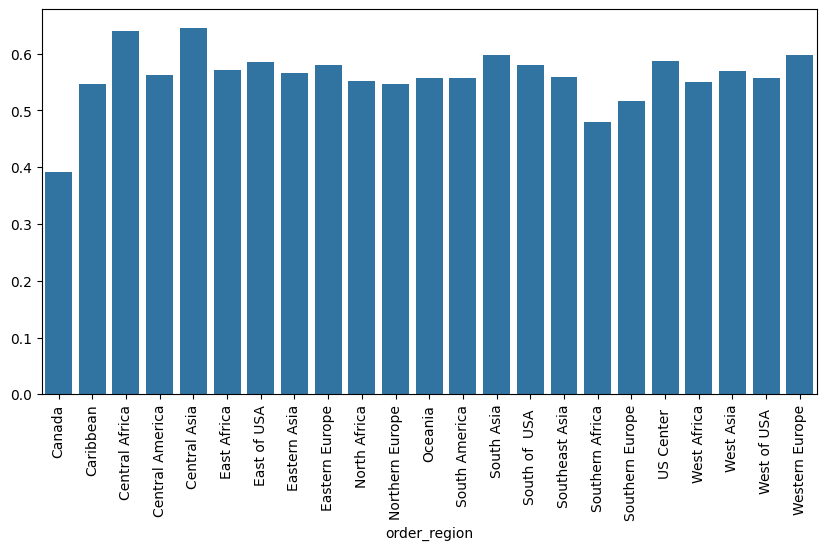

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df.groupby("order_region")["delivery_delay"].mean().index,
    y=df.groupby("order_region")["delivery_delay"].mean().values
)
plt.xticks(rotation=90)
plt.show()

### Late Risk vs Shipping Mode

In [29]:
df.groupby("shipping_mode")["late_delivery_risk"].mean()

shipping_mode
First Class       0.953225
Same Day          0.457430
Second Class      0.766328
Standard Class    0.380717
Name: late_delivery_risk, dtype: float64

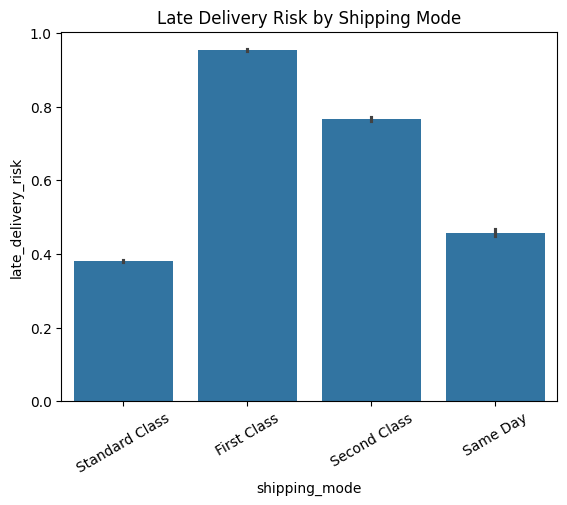

In [30]:
sns.barplot(x="shipping_mode",y="late_delivery_risk", data=df)
plt.xticks(rotation=30)
plt.title("Late Delivery Risk by Shipping Mode")
plt.show()

In [32]:
df.columns

Index(['type', 'Shipping_Days', 'Shipment_days', 'benefit_per_order',
       'sales_per_customer', 'delivery_status', 'late_delivery_risk',
       'category_id', 'category_name', 'customer_city', 'customer_country',
       'customer_fname', 'customer_id', 'customer_lname', 'customer_segment',
       'customer_state', 'customer_street', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'Order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'product_status', 'Shipping_Date',
       'shipping_mode', 'delivery_delay', 'delay_stat

## Delivery Status Distribution

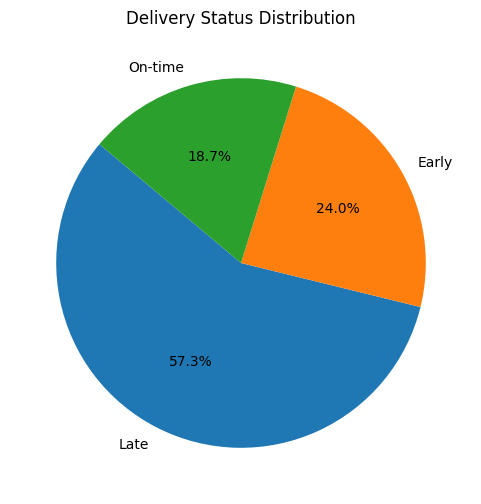

In [41]:
delay_counts = df['delay_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    delay_counts,
    labels=delay_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Delivery Status Distribution")
plt.show()


## Late vs On-Time Orders

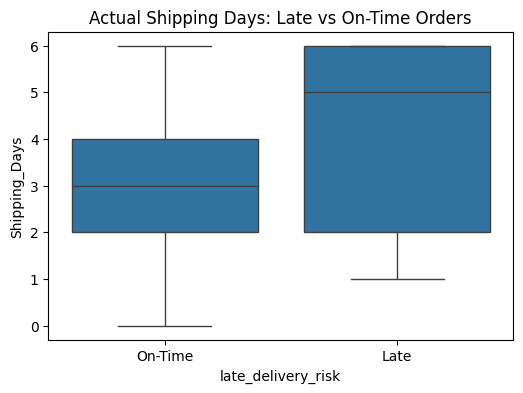

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='late_delivery_risk',
    y="Shipping_Days",
    data=df
)
plt.xticks([0,1], ['On-Time', 'Late'])
plt.title("Actual Shipping Days: Late vs On-Time Orders")
plt.show()


## Scheduled vs Actual Shipping Days Distribution

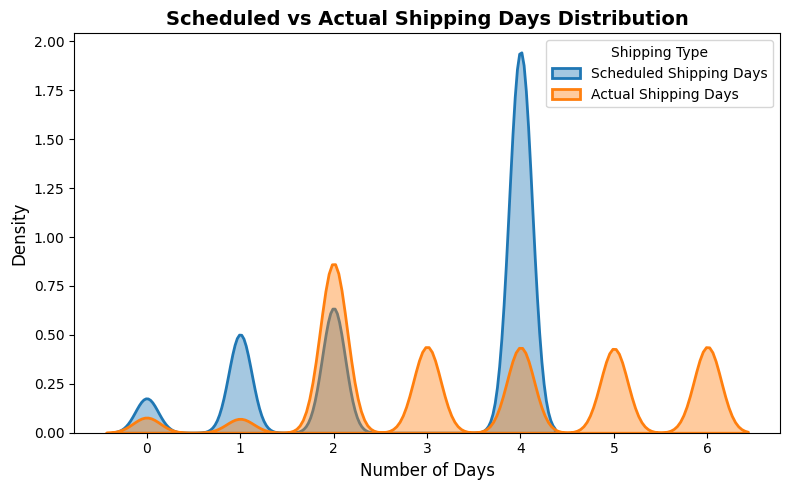

In [42]:
plt.figure(figsize=(8,5))

sns.kdeplot(df['Shipment_days'], label='Scheduled Shipping Days',fill=True, alpha=0.4,linewidth=2)

sns.kdeplot(df['Shipping_Days'], label='Actual Shipping Days',fill=True,alpha=0.4,linewidth=2)

plt.title("Scheduled vs Actual Shipping Days Distribution",fontsize=14,fontweight='bold')
plt.xlabel("Number of Days", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.legend(title="Shipping Type")
plt.tight_layout()
plt.show()


## Key Findings
### - Standard shipping shows higher delivery delays
### - Certain regions experience consistent late deliveries
### - Late delivery risk aligns with actual delivery delays